In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

(0) Load

In [6]:
file = '/Users/robertpinochetgomez/GitHub/02-kmeans/01-datasets/Mall_Customers.csv'

df_customers = pd.read_csv(file)

print(df_customers.info())
df_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(1) Exploratory Analysis

- Distribution & Boxplot & Relationships

In [7]:
df_customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

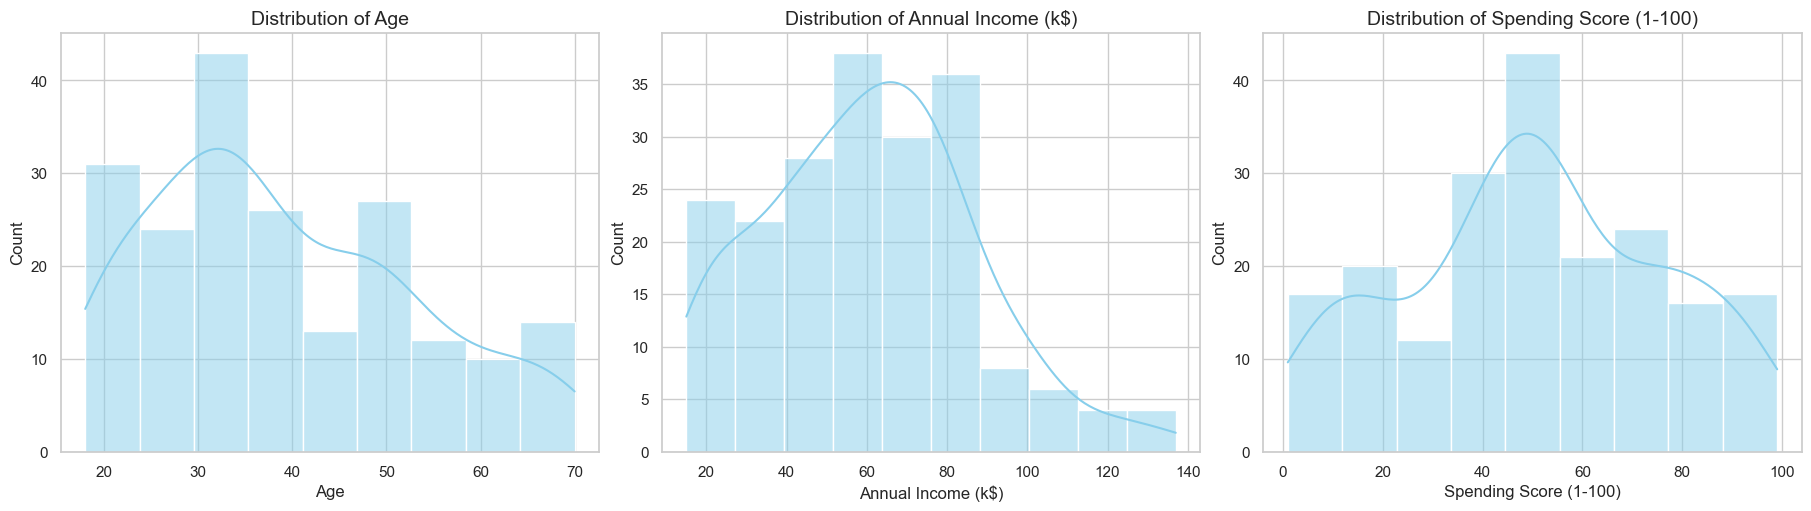

In [10]:
variables = df_customers.columns[2:5]
sns.set(style="whitegrid")

n_vars = len(variables)
# Define grid size (e.g., square-ish layout)
n_cols = 3  # You can change this to control width
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), constrained_layout=True)

# Flatten the axes array for easy indexing, if needed
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=df_customers, x=var, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

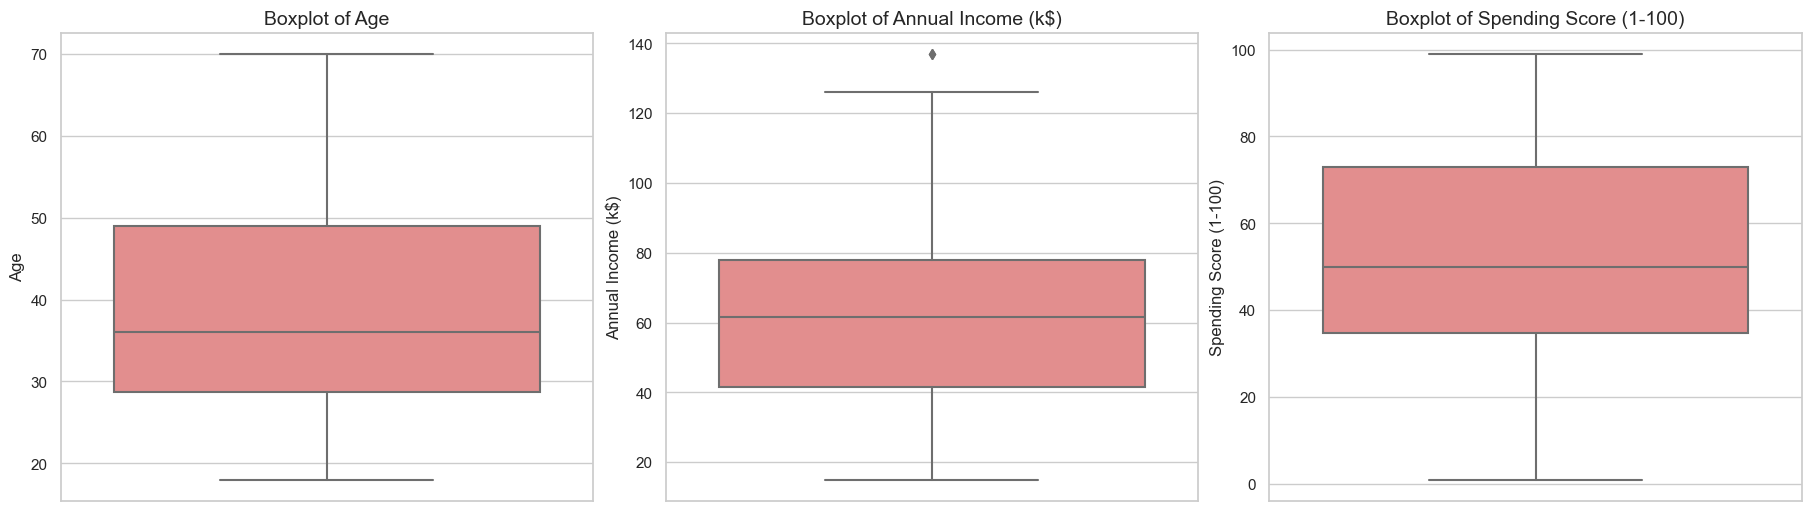

In [12]:
variables = df_customers.columns[2:5]
sns.set(style="whitegrid")

n_vars = len(variables)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df_customers, y=var, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var, fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

- Relationship between mpg and all other variables

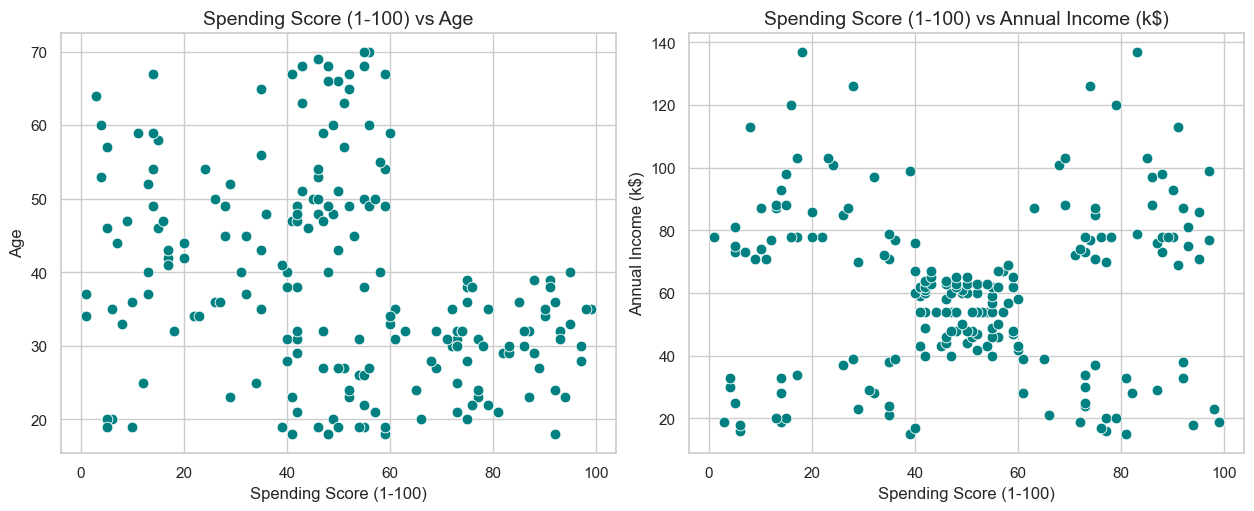

In [13]:
independent_vars = ['Age', 'Annual Income (k$)']
target = 'Spending Score (1-100)'

sns.set(style="whitegrid")

n_vars = len(independent_vars)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, var in enumerate(independent_vars):
    sns.scatterplot(data=df_customers, x=target, y=var, ax=axes[i], color='teal', edgecolor='white', s=60)
    axes[i].set_title(f'{target} vs {var}', fontsize=14)
    axes[i].set_xlabel(target, fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

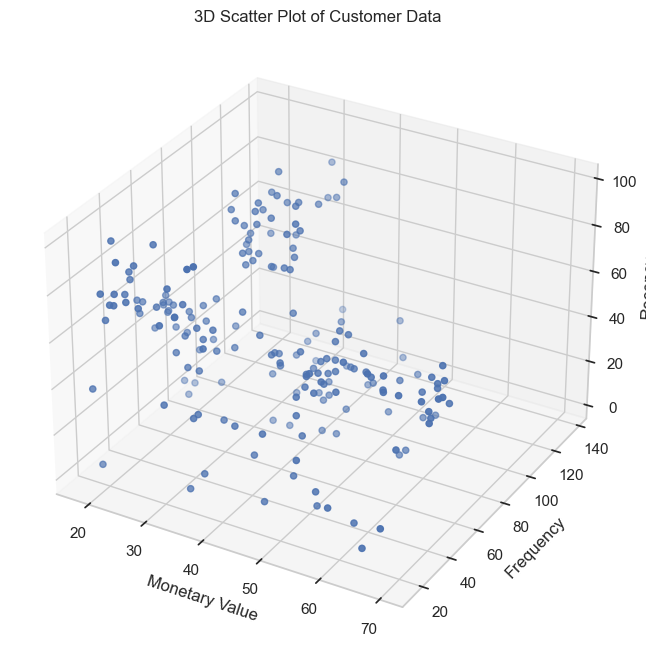

In [16]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df_customers["Age"], df_customers["Annual Income (k$)"], df_customers["Spending Score (1-100)"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

- Correlation Heatmap

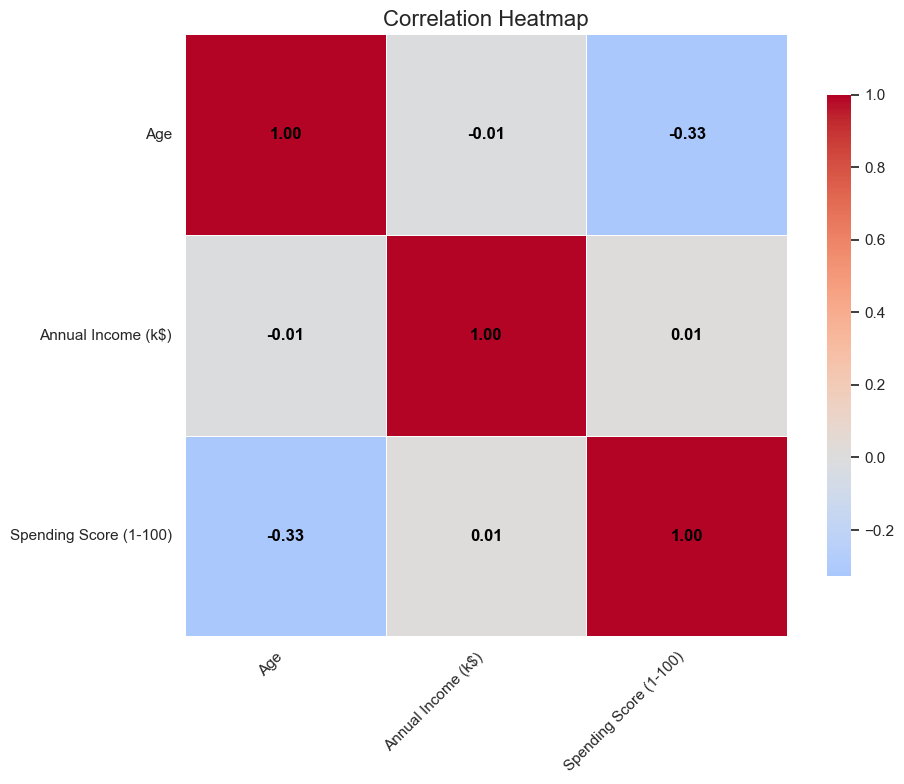

In [14]:
vars_corr = df_customers.columns[2:5]
corr = df_customers[vars_corr].corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        value = corr.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}",
                ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(np.arange(len(corr.columns)) + 0.5, corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.index)) + 0.5, corr.index, rotation=0)
plt.tight_layout()
plt.show()